#Jamboree Education Analysis and Prediction

**Context:** Jamboree has launched a fearure to help students estimate their chances of getting into ivy, Leauge college for graduate programs. To enhance this feature , an analysis is required to understand the factors influncing admission and predict admission chance based on varies parameters.

**Objective:**
* Perform EDA to understand the data
  distribution and relationship between variables.

* Build and evaluate Linear Regression
  models to predict the chances of admission

* Test the assumptions of linear   regression models validity.

* provide actionable insights and recommanditions based on the analysis.




##Importing necessary libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv('Jamboree_Admission.csv')

#Displaying the first few rows
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


##Exploratory Data Analysis (EDA)

**Understanding the Data Structure**

In [4]:
# Checking shape of the dataset
print("shape of the data:",df.shape,'\n\n')
print("//////////////////////////////////////")

# Checking data types
print(df.info(),'\n\n')
print("//////////////////////////////////////")

# Checking missing values
print(df.isnull().sum())

shape of the data: (500, 9) 


//////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None 


//////////////////////////////////////
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit 

**Observations:**
* The dataset contains 500 rows and 9 cols.
* All variables are numerical.
* No missing values are detected in the intial check.

##Statistical summary

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Observations:**
* **GRE** Scores range from 290 to 340
* **TOEFL** Scores range from 92 to 120
* **University Rating,SOP and LOR** are scaled from 1 to 5
* **CGPA** ranges from 6.8 to 9.92
* **Research Experince** is binary (0 or 1)
* **Chances of Admit** ranges from 0.34 to 0.97

##Dropping Unique Identifier

In [6]:
df.drop('Serial No.', axis = 1, inplace = True)

**Reasoning:**
* The 'Serial No.' column is a unique identifire and does not contribute to the prediction keeping it may introduce unnecessary noise.

##Univariate Analysis


**Distribution Plots**

<ipython-input-7-abbb3857459f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],kde = True, bins = 30)
<ipython-input-7-abbb3857459f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],kde = True, bins = 30)
<ipython-input-7-abbb3857459f>:10: UserWarning: 

`distplot` is a deprec

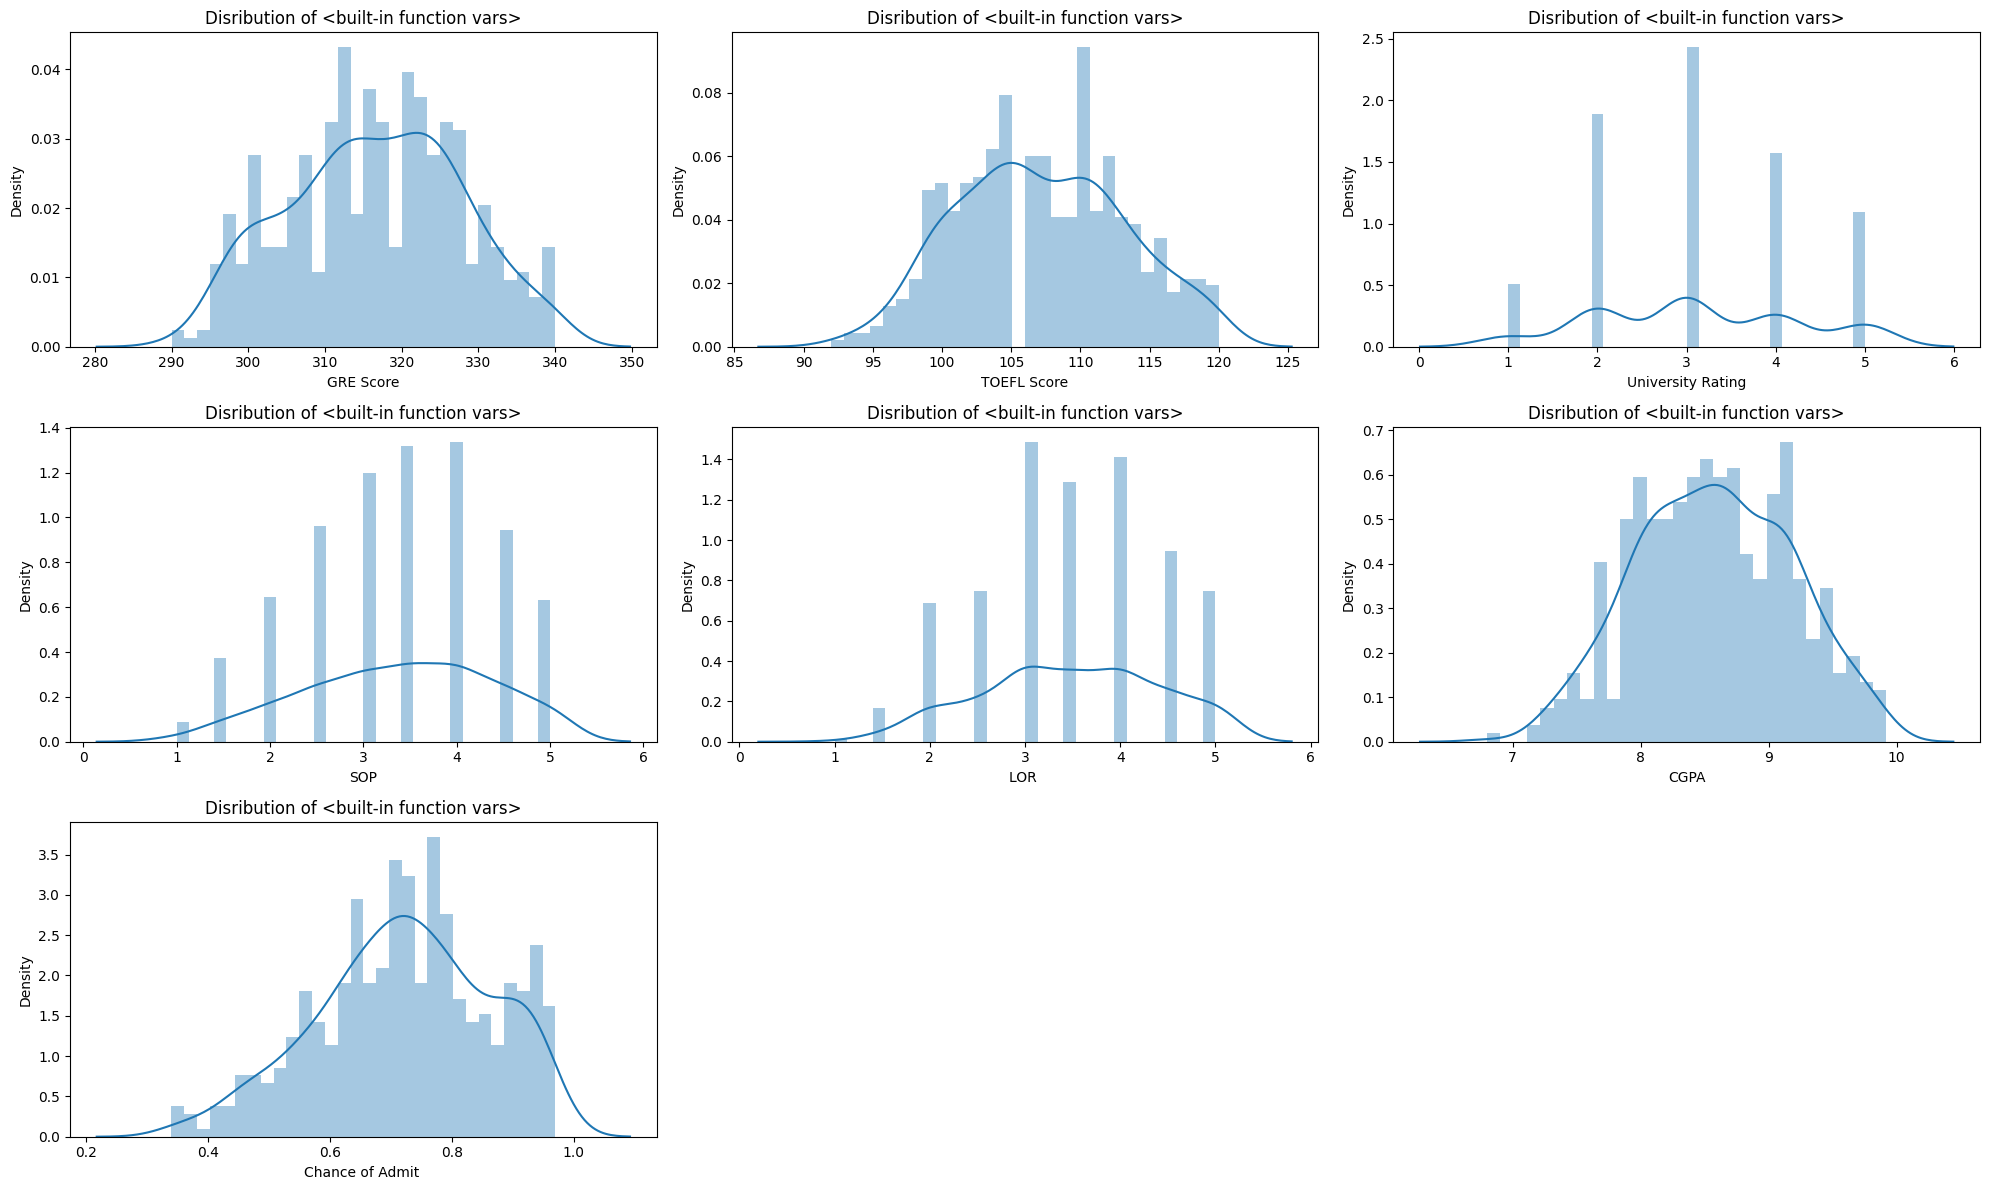

In [7]:
#List of continuos variables
continuos_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'
       , 'Chance of Admit ']

plt.figure(figsize=(20,12))

#plotting the distributions
for i, var in enumerate(continuos_vars):
  plt.subplot(3,3,i+1)
  sns.distplot(df[var],kde = True, bins = 30)
  plt.title(f'Disribution of {vars}')
plt.tight_layout()
plt.show()

**Observations:**
* **GRE Score and TOEFL** are somewhat right-skewed indicating less student have higher score.
* **Chances of Admit** is left skewed, indicating a higher addmission probablity for many appicant.
* **SOP,CGPA and LOR** show somewhat uniform distribution.

##Bivariate Analysis

**Correlation Heatmap**

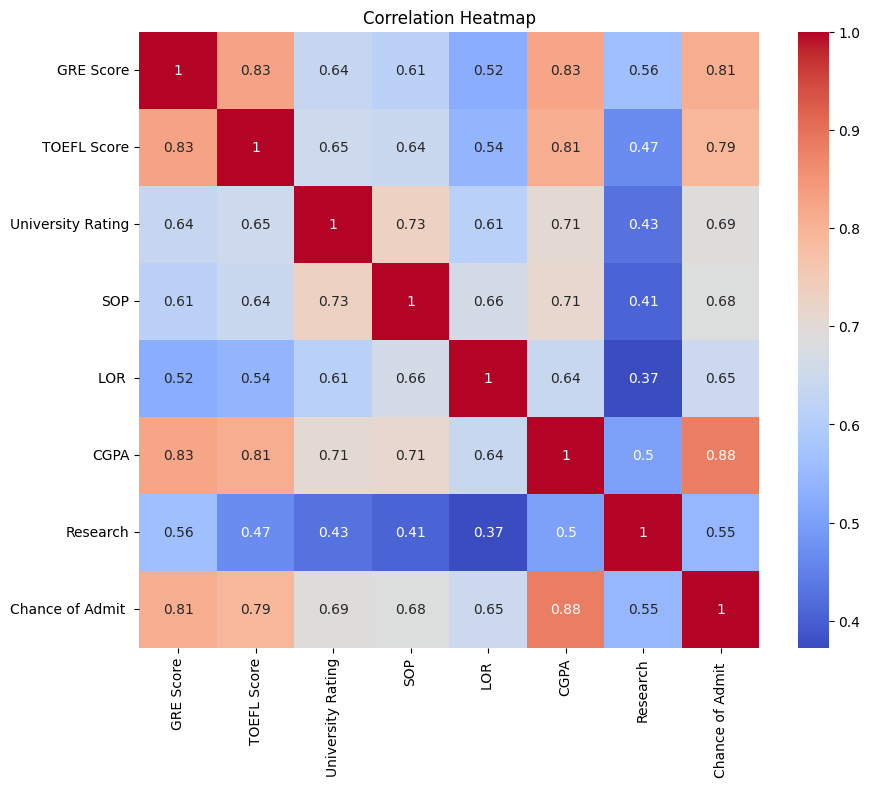

In [8]:
#Calculating correlation matrix
corr_matrix = df.corr()

#plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observations:**
* **CGPA** has a strong correlation with **Chance of Admit** (0.88)
* **GRE Score and TOEFL** Score also show strong positive correlation with Chance of admit
* **Research Experience** has a modrate correlation with **Chance of Admit**
* High correlation among **GRE Score,TOEFL Score and CGPA** suggest multicollinerity, which needs to be addressed.

**Scatter plots**

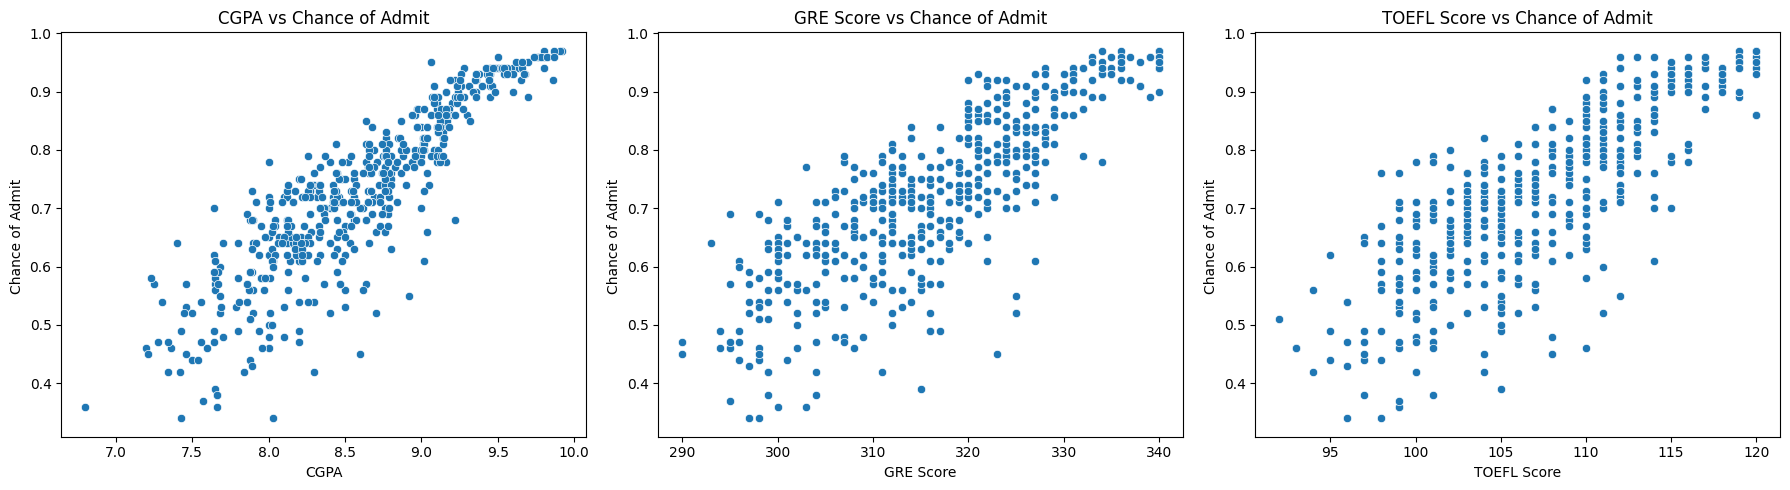

In [9]:
# Scatter plots for top correlated variables
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title('CGPA vs Chance of Admit')

plt.subplot(1, 3, 2)
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title('GRE Score vs Chance of Admit')

plt.subplot(1, 3, 3)
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df)
plt.title('TOEFL Score vs Chance of Admit')

plt.tight_layout()
plt.show()


**Observations:**
* There is a positive linear relationship between **CGPA,GRE Score,TOEFL and Chance of Admit.**
* Higher score corrospond to higher chance of admission.

##Data Preprocessing

**Duplicate value check**

In [10]:
# Checking for duplicate rows

duplicates = df.duplicated().sum()
duplicates

0

**Observations:**
* There are no duplicate rows in data

##Missing Value Treatment

In [11]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Observations:**
* No missing vales found.

##Outlier Detection and Treatment

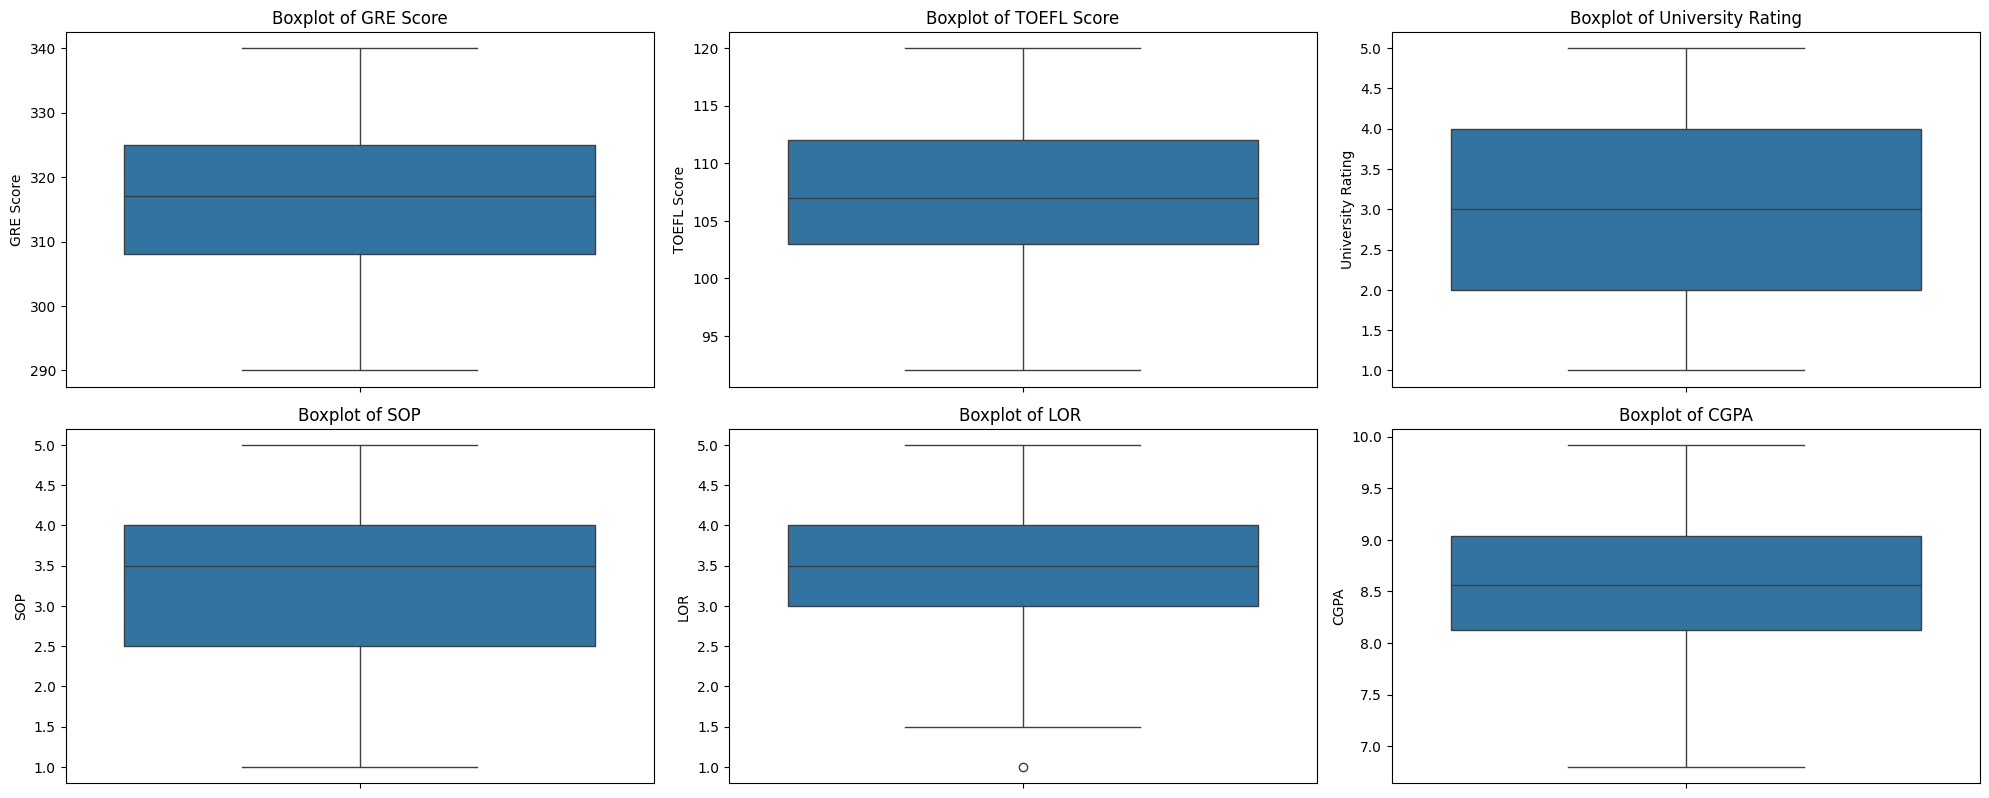

In [12]:
# Boxplot to detect outliers
plt.figure(figsize=(20,12))

for i,var in enumerate(continuos_vars[:-1]):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[var])
  plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

**Observations:**
* Minor outlier present on LOR but they seems manageable

## Feature Engineering
Since all features are numerical and appropriately scaled, no additional feature engineering is neccesary at this point.

##Data Preparation for Modeling

In [18]:
# Defining feature matrix x and target variable y

X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

# Adding constant term for statsmodels
X_sm = sm.add_constant(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm,y,test_size = 0.2,random_state = 42)

##Model Building

**Linear Regression using Statsmodels**

In [20]:
# Building OLS model
model = sm.OLS(y_train,X_train).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          3.41e-142
Time:                        11:40:20   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4214      0.12

**Observations:**
* **R-square** and **Adj R-square** values indicating the proprotion of varience explained by the model.

* **F-statistic** tests the overall significance of the model.

##Model Coefficients

In [24]:
#Displaying model coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns,
                             'Coefficient': model.params})
coefficients

,Feature,Coefficient
const,const,-1.421447
GRE Score,GRE Score,0.002434
TOEFL Score,TOEFL Score,0.002996
University Rating,University Rating,0.002569
SOP,SOP,0.001814
LOR,LOR,0.017238
CGPA,CGPA,0.112527
Research,Research,0.024027


**Interpretation:**
* Each coff represent the expected change in Chance of Admit for a one-unit change in the feature, holfing variables const

* Feature with higher coeff have a more substaniable impact on the admission chances.

##Testing Linear Regression Assumptions


**Multicollinearity Check using VIF**

In [32]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


#creating dataframe for VIF
vif_data = pd.DataFrame()
vif_data['Features'] = X_train.columns.drop('const')
vif_data['VIF'] = [variance_inflation_factor(X_train.values,i+1) for i in range(len(X_train.columns)-1)]

vif_data


,Features,VIF
0,GRE Score,4.489983
1,TOEFL Score,3.664298
2,University Rating,2.572110
3,SOP,2.785764
4,LOR,1.977698
5,CGPA,4.654540
6,Research,1.518065


**Observations:**
* VIF values grater than 5 indicate high multicollinearity.

* If multicollinarity is dedected, consider removing or combining corelated features.

**Action:**
Lets assme if **GRE Score** and **TOEFL Score** show high VIF, consider dropping them.

In [33]:
# Dropping 'TOEFL Score' due to high VIF
X_train_vif  = X_train.drop('TOEFL Score',axis = 1)
X_test_vif = X_test.drop('TOEFL Score',axis = 1)

# Rebuilding the model
model_vif = sm.OLS(y_train,X_train_vif).fit()
print(model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     291.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          2.73e-141
Time:                        12:23:48   Log-Likelihood:                 556.83
No. Observations:                 400   AIC:                            -1100.
Df Residuals:                     393   BIC:                            -1072.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4417      0.12

In [37]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


#creating dataframe for VIF
vif_data = pd.DataFrame()
vif_data['Features'] = X_train_vif.columns.drop('const')
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values,i+1) for i in range(len(X_train_vif.columns)-1)]

vif_data

,Features,VIF
0,GRE Score,3.613031
1,University Rating,2.547616
2,SOP,2.749622
3,LOR,1.976876
4,CGPA,4.347646
5,Research,1.515133


**Observations:**
* by dropping **TOEFL Score** we are able to reduced VIF

##Mean of Residuals

In [39]:
#Calculating residuals
residuals = model_vif.resid

# Mean of residuals
print(f'Mean of residuals: {np.mean(residuals)}')

Mean of residuals: -1.116468029138673e-15


**Observations:**
* The mean of residuals should be closed to zero. A value significantly different from zero indicates bias.

##Linearity of Variables

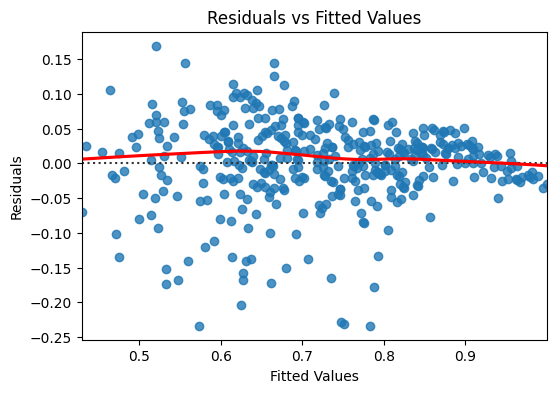

In [44]:
# Plotting predicted vs residuals
plt.figure(figsize = (6,4))
sns.residplot(x = model_vif.fittedvalues,y = residuals,lowess = True, line_kws = {'color':'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Observations:**
* The residuals should be randomly scattered around zero without any specific pattern.
* Presence of pattern indicates non linearity.

##Test of Homoscedasticy

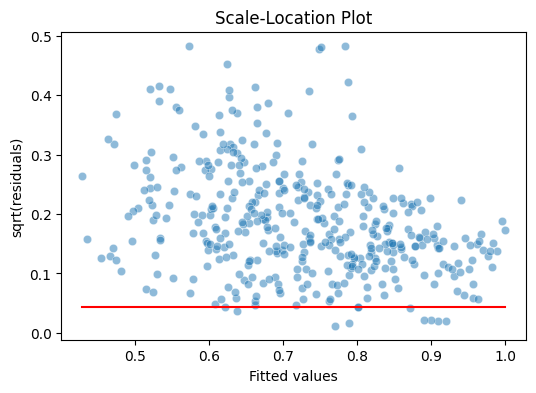

In [45]:
#Plotting scale-location plot

plt.figure(figsize = (6,4))
sns.scatterplot(x = model_vif.fittedvalues, y = np.sqrt(np.abs(residuals)),alpha = 0.5)
sns.lineplot(x = model_vif.fittedvalues, y = np.mean(np.abs(residuals)),color = 'red')
plt.xlabel('Fitted values')
plt.ylabel('sqrt(residuals)')
plt.title('Scale-Location Plot')
plt.show()

**Observations:**
* The spread of residuals should be constant across all fitted values.
* If residuals spread increases or decreases hecteroscedasticity is present.


##Breusch-Pagan Test

In [46]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals,model_vif.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels,bp_test)))

{'LM Statistic': 25.74676692395701, 'LM-Test p-value': 0.0002481681027594144, 'F-Statistic': 4.50607525727514, 'F-Test p-value': 0.00019750038502898258}


**Interpretation:**
* A p-value > 0.05 indicates homoscedasticity
* here homoscedasticity is **not present**

##Normality of Residuals


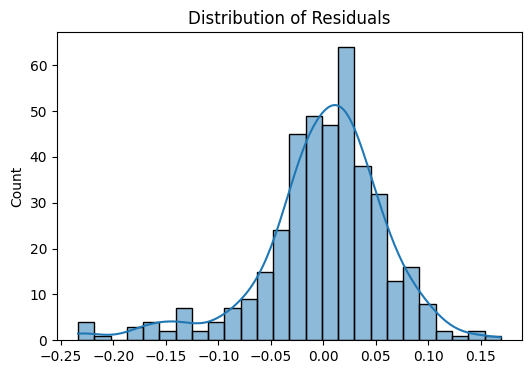

In [47]:
plt.figure(figsize = (6,4))
sns.histplot(residuals,kde = True)
plt.title('Distribution of Residuals')
plt.show()

**Observations:**
* Residuals seems approx normally distributed

##Model performance Evaluation

In [49]:
# Predicting on test data
y_pred = model_vif.predict(X_test_vif)

# Calculating performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2)*(len(y_test) - 1)/(len(y_test) - X_test_vif.shape[1] - 1)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print(f'Adjusted R2 Score: {adj_r2}')


MAE: 0.04261025125283008
RMSE: 0.060904615911646136
R2 Score: 0.8186126044330005
Adjusted R2 Score: 0.8048113895529028


**Interpretations:**
* High R2 and Adj R2 values close to 1 indicates a good fit.
* Low MAE and RMSE values indicates accurate predictions

##Actionable Insights & Recommendations

**Insights:**
* **CGPA** is most significant predictor of admission chances. Students should focus on maintaining a high CGPA.

* **GRE Score** significantly influence admission probability. Adequate prep for GRE can improve admission chances.

* **Research** enhances admission prospects, so engaging into research is benificial.

* **SOP** and **LOR** contribute positively but add less impact.

* **University Rating** has a modrate effect.


##Recommendations

**For Students:**

* Proritize academic  excellence, particularly in undergraduate studies.

* Prepare thoroughly for tests like GRE and TOEFL

* Gain research experience

* Invest time in writing SOPs and obtaining strong LORs

**For Jamboree:**
* Focus coaching programs on improving students CGPA and test prepration

* Offer workshops or guidence on reasearch opportunities and crafting SOPs/LORs

* Consider collecting extra info like extracurricular activities, work experience and publications to enhance model accuracy.

Created by ~ Lalit singh 😊